## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
%pwd

'c:\\Users\\Vallee\\Desktop\\Stack\\myDS_projects\\pH_level_forecasting\\notebook'

In [2]:
import os
os.chdir("../")

%pwd

'c:\\Users\\Vallee\\Desktop\\Stack\\myDS_projects\\pH_level_forecasting'

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_excel('notebook/Dataset/Dataset Disssertation.xlsx')

#### Show Top 5 Records

In [5]:
df.head()

,WP_ID,DataType,Date_Assessment_Original,Date_Assessment,Time_Assessment,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),...,Volume 50/100ml,N_VALUE,HCO3,Corrected_HCO3,Tryptophan_Probe_µgL,Sample_taken,SURVEY_DETAIL_ID,COUNTRY,Comment,Final HCO3
0,MMZ37,Field,NaN,2016-09-05,10:40:00,23.3,5.99,123.7,0.21,0.0,...,50.0,0.16,56.198952,56.198952,NaN,Sampled,941,MAL,PVC pipes installed,56.198952
1,MMZ38,Field,NaN,2016-09-05,14:10:00,24.9,6.03,115.2,0.15,0.0,...,50.0,0.16,59.490430,59.490430,NaN,Sampled,942,MAL,PVC pipes installed,59.490430
2,MMZ39,Field,NaN,2016-09-06,03:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Not sampled,943,MAL,NaN,NaN
3,MMZ40,Field,NaN,2016-09-06,04:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Not sampled,944,MAL,NaN,NaN
4,MMZ35,Field,NaN,2016-09-06,09:30:00,24.7,5.65,367.9,0.25,0.0,...,50.0,0.16,96.550043,96.550043,NaN,Sampled,939,MAL,PVC pipes installed,96.550043


#### Remove all Unsampled Rows

In [6]:
df = df[df['Sample_taken'] == 'Sampled']
df.shape

(162, 22)

#### Drop Unneeded Features

In [7]:
df= df.drop(columns=['WP_ID','DataType','Date_Assessment_Original','SURVEY_DETAIL_ID','COUNTRY','Comment','HCO3','Corrected_HCO3','Sample_taken'],axis=1)
df.shape

(162, 13)

In [8]:
df = df.drop(columns=['Date_Assessment','Time_Assessment'])
df.sample(5)

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,Volume 50/100ml,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
122,26.9,6.38,173.8,0.27,0.000,199.0,199.0,50.0,0.16,0.3,48.518835
135,27.3,7.29,516.1,1.05,0.091,116.0,117.0,50.0,1.60,0.2,284.042424
36,24.4,6.08,207.2,1.19,0.000,318.0,322.0,50.0,0.16,NaN,78.020236
102,23.8,7.19,676.8,0.33,0.007,111.0,105.0,50.0,1.60,NaN,263.318298
199,25.0,7.07,2654.0,0.28,0.005,226.0,220.0,50.0,1.60,1.4,543.703523


#### Check Missing Values

In [9]:
df.isna().sum()

Temp (oC)                0
pH                       0
SEC (µS/cm)              0
Turbidity (<NTU)         0
Total Iron (mg/l)        1
Titration 1              0
Titration 2              0
Volume 50/100ml          0
N_VALUE                  0
Tryptophan_Probe_µgL    64
Final HCO3               0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
columns_to_impute = ['Total Iron (mg/l)', 'Tryptophan_Probe_µgL']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [11]:
df.isna().sum()

Temp (oC)               0
pH                      0
SEC (µS/cm)             0
Turbidity (<NTU)        0
Total Iron (mg/l)       0
Titration 1             0
Titration 2             0
Volume 50/100ml         0
N_VALUE                 0
Tryptophan_Probe_µgL    0
Final HCO3              0
dtype: int64

#### Preparing X and Y variables

In [12]:
X = df.drop(columns=['pH'],axis=1)

In [13]:
X.head()

,Temp (oC),SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,Volume 50/100ml,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
0,23.3,123.7,0.21,0.00,228.0,233.0,50.0,0.16,0.45,56.198952
1,24.9,115.2,0.15,0.00,246.0,242.0,50.0,0.16,0.45,59.490430
4,24.7,367.9,0.25,0.00,401.0,391.0,50.0,0.16,0.45,96.550043
5,24.3,314.8,0.24,0.01,376.0,373.0,50.0,0.16,0.45,91.308058
7,23.6,334.6,11.70,0.00,752.0,788.0,50.0,0.16,0.45,187.736194


In [14]:
y = df['pH']

In [15]:
y

0      5.99
1      6.03
4      5.65
5      6.09
7      7.06
       ... 
195    7.19
196    7.02
197    7.00
198    6.92
199    7.07
Name: pH, Length: 162, dtype: float64

#### Creating Pipeline with Column Transformer

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
# cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# Responsible for tranforming the data columns
preprocessor = ColumnTransformer(
    [
        # ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(162, 10)

In [19]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((129, 10), (33, 10))

#### Create an Evaluate Function to give all metrics after model Training

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2792
- Mean Absolute Error: 0.2114
- R2 Score: 0.7064
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3917
- Mean Absolute Error: 0.3201
- R2 Score: 0.4927


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5152
- Mean Absolute Error: 0.4042
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5512
- Mean Absolute Error: 0.4850
- R2 Score: -0.0049


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2798
- Mean Absolute Error: 0.2125
- R2 Score: 0.7050
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3850
- Mean Absolute Error: 0.3159
- R2 Score: 0.5097


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2561
- Mean Absolute Error: 0.1938
- R2 Score: 0.7529
----------------------

### Results

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.683821
7,CatBoosting Regressor,0.607295
5,Random Forest Regressor,0.567190
3,K-Neighbors Regressor,0.532495
2,Ridge,0.509717
6,XGBRegressor,0.494227
0,Linear Regression,0.492654
4,Decision Tree,0.290697
1,Lasso,-0.004897


#### The models are not performing well, for this we perform outlier detection and handling techniques.

##### Box_Plot for Outliers Detection

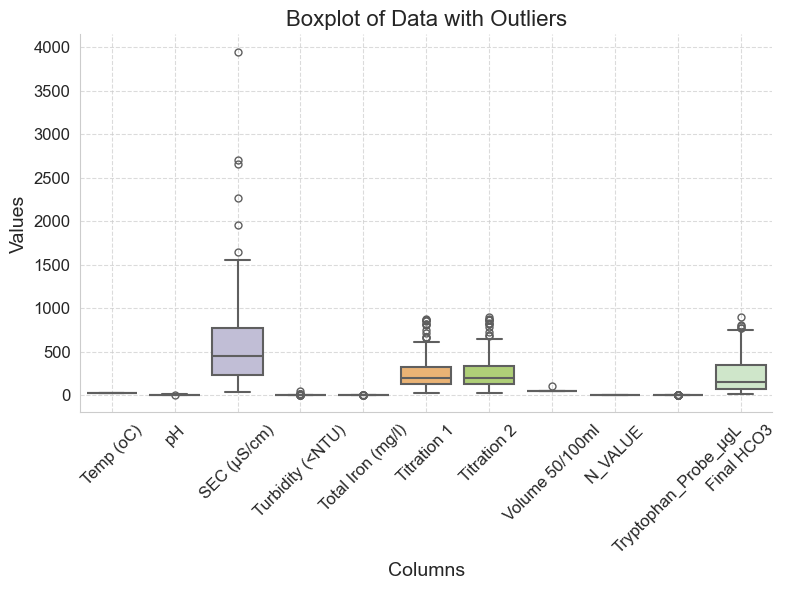

In [23]:
# Box_Plot for Outliers Detection

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot for each column in df_knn_cont
sns.boxplot(data=df, palette="Set3", fliersize=5, linewidth=1.5)

# Add title and labels
plt.title('Boxplot of Data with Outliers', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
# plt.savefig('boxplot1.png')
plt.show()

In [25]:
# Copy the original DataFrame
df_knn_rest = df.copy()

# Calculate Quartiles and IQR for all columns
Q1 = df_knn_rest.quantile(0.25)
Q3 = df_knn_rest.quantile(0.75)
IQR = Q3 - Q1

# Compute lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median for each column
for column in df_knn_rest.columns:
    # Identify outliers
    outliers = (df_knn_rest[column] < lower_bound[column]) | (df_knn_rest[column] > upper_bound[column])
    
    # Replace outliers with median
    median_value = df_knn_rest[column].median()
    df_knn_rest.loc[outliers, column] = median_value

# Check if any column still contains outliers
outliers_after_replacement = (df_knn_rest < lower_bound) | (df_knn_rest > upper_bound)

if outliers_after_replacement.any().any():
    print("Some columns still contain outliers after replacement.")
    print("Columns with outliers:")
    print(outliers_after_replacement.any())
else:
    print("No columns contain outliers after replacement.")


No columns contain outliers after replacement.


In [26]:
# Restore back to Dataframe
df_restored = pd.DataFrame(df_knn_rest, columns=df.columns)

# Print the restored DataFrame
print("Restored DataFrame:")
df_restored.head()

Restored DataFrame:


,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,Volume 50/100ml,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
0,23.3,5.99,123.7,0.21,0.00,228.0,233.0,50.0,0.16,0.45,56.198952
1,24.9,6.03,115.2,0.15,0.00,246.0,242.0,50.0,0.16,0.45,59.490430
4,24.7,5.65,367.9,0.25,0.00,401.0,391.0,50.0,0.16,0.45,96.550043
5,24.3,6.09,314.8,0.24,0.01,376.0,373.0,50.0,0.16,0.45,91.308058
7,23.6,7.06,334.6,0.40,0.00,198.5,202.5,50.0,0.16,0.45,187.736194


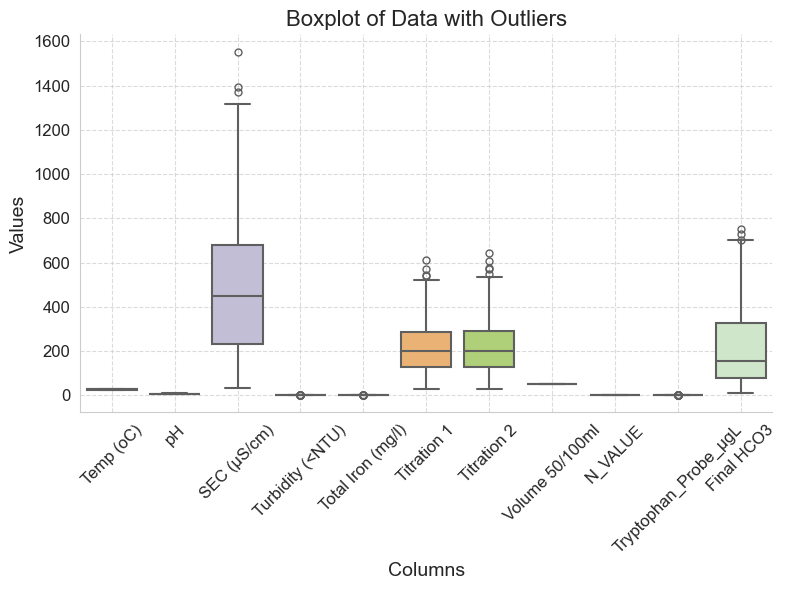

In [27]:
# Box_Plot for Outliers Detection

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot for each column in df_knn_cont
sns.boxplot(data=df_restored, palette="Set3", fliersize=5, linewidth=1.5)

# Add title and labels
plt.title('Boxplot of Data with Outliers', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
# plt.savefig('boxplot1.png')
plt.show()

In [33]:
X_new = df_restored.drop(columns=['pH'],axis=1)
y_new = df_restored['pH']

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create Column Transformer with 3 types of transformers
num_features = X_new.select_dtypes(exclude="object").columns
# cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# Responsible for tranforming the data columns
preprocessor = ColumnTransformer(
    [
        # ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [39]:
X_new = preprocessor.fit_transform(X_new)
X_new

array([[-1.75068904, -1.11280817, -0.86022019, ..., -1.22160046,
         0.21212457, -0.87291209],
       [-0.78252476, -1.1376834 , -1.04824223, ..., -1.22160046,
         0.21212457, -0.85541224],
       [-0.90354529, -0.39815742, -0.73487216, ..., -1.22160046,
         0.21212457, -0.65837688],
       ...,
       [ 0.30666006,  1.63312465, -1.26760128, ...,  0.81859825,
         1.89995264,  2.15974727],
       [ 0.36717033,  1.91992142,  1.67807738, ...,  0.81859825,
         1.89995264,  0.94123913],
       [-0.72201449, -0.15964786, -0.64086114, ...,  0.81859825,
         0.21212457,  1.71901028]])

In [40]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((129, 10), (33, 10))

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3014
- Mean Absolute Error: 0.2282
- R2 Score: 0.6289
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3005
- Mean Absolute Error: 0.2601
- R2 Score: 0.7013


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4948
- Mean Absolute Error: 0.3910
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5505
- Mean Absolute Error: 0.4830
- R2 Score: -0.0021


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3014
- Mean Absolute Error: 0.2282
- R2 Score: 0.6288
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3003
- Mean Absolute Error: 0.2592
- R2 Score: 0.7018


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2649
- Mean Absolute Error: 0.1989
- R2 Score: 0.7134
----------------------

#### Results

In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.701819
0,Linear Regression,0.701262
8,AdaBoost Regressor,0.685381
7,CatBoosting Regressor,0.640641
3,K-Neighbors Regressor,0.595469
5,Random Forest Regressor,0.571746
6,XGBRegressor,0.465058
4,Decision Tree,0.267375
1,Lasso,-0.002149


## CatBoost Regression

In [43]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 70.13


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

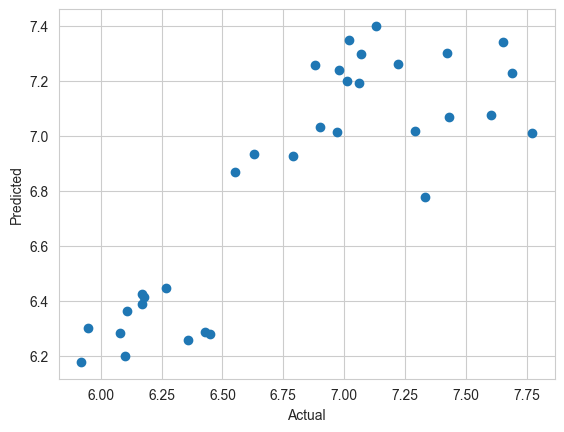

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

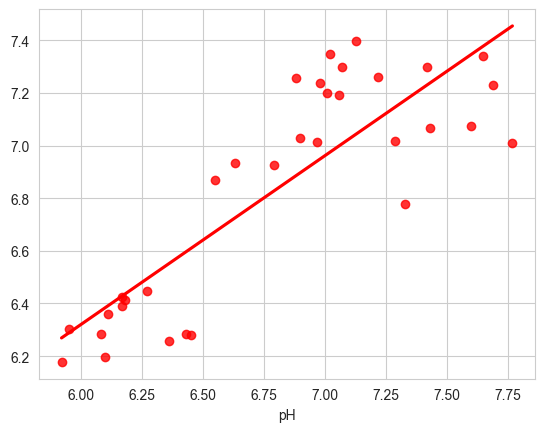

In [45]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
196,7.02,7.348942,-0.328942
140,6.10,6.197964,-0.097964
167,7.01,7.198620,-0.188620
69,7.77,7.008488,0.761512
120,7.69,7.229180,0.460820
35,6.17,6.425399,-0.255399
128,7.22,7.262090,-0.042090
64,6.36,6.259363,0.100637
127,6.63,6.934191,-0.304191
181,7.65,7.339660,0.310340
